###  Updates:
- Visualization is now more compact
- Submission of your accuracy: [Submission](https://forms.gle/meg5gcLX3nev2U9B6)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed
# The code below makes sure that your results are reproducible (tightening the randomness) 
# (you can change the seed number to your liking), Note that optimzers are stochastic nature
seed(47)
import keras
keras.__version__

'2.8.0'

In [ ]:
from keras.datasets import mnist
(train_image,train_label),(test_image,test_label) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


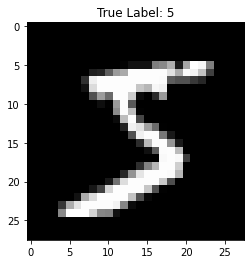

In [ ]:
for j in range(1):
  plt.imshow(mnist.load_data()[0][0][j],cmap='gray')
  plt.title('True Label: '+ str(mnist.load_data()[0][1][j]))
  plt.show()

## Preprocessing
We now transform the images from 28x28 -> 768 pixels (each pixel can be fed into one neuron) 


In [ ]:
from tensorflow.keras.utils import to_categorical
# We transform the 28x28 images to a 4 dimensional vector to make it compatable with keras api
X_train = train_image.reshape(60000,784)
X_test = test_image.reshape(10000,784)

# We transform labels images to a vector of label 
# (e.g., 5 becomes [0,0,0,0,1,0,0,0,0])
# (e.g., 0 becomes [1,0,0,0,0,0,0,0,0])
y_train = to_categorical(train_label)
y_test = to_categorical(test_label)


# Deep Model

In [ ]:
from keras import layers, models
# The model is sequential, meaning that we can add a sequence of layers
# Adding a sequence can be done by network.add() 
network = models.Sequential()
network.add(layers.Flatten()) # Flatten array to one-dimensional
network.add(layers.Dense(256, activation = 'tanh')) #Layer 1
network.add(layers.Dense(10, activation = 'sigmoid')) #Last layer must have 10 neuron (each neuron represent a digit)

# Configures the model for training.
network.compile(optimizer='RMSprop', loss='mse', metrics=['accuracy'])
# Trains the model for a fixed number of epochs
history = network.fit(X_train,y_train, epochs=20, batch_size=16)

Epoch 1/20
3750/3750 [==============================] - 18s 5ms/step - loss: 0.0231 - accuracy: 0.8663
Epoch 2/20
3750/3750 [==============================] - 17s 4ms/step - loss: 0.0149 - accuracy: 0.9107
Epoch 3/20
3750/3750 [==============================] - 17s 4ms/step - loss: 0.0136 - accuracy: 0.9197
Epoch 4/20
3750/3750 [==============================] - 17s 4ms/step - loss: 0.0123 - accuracy: 0.9265
Epoch 5/20
3750/3750 [==============================] - 16s 4ms/step - loss: 0.0118 - accuracy: 0.9287
Epoch 6/20
3750/3750 [==============================] - 17s 4ms/step - loss: 0.0114 - accuracy: 0.9308
Epoch 7/20
3750/3750 [==============================] - 17s 5ms/step - loss: 0.0110 - accuracy: 0.9334
Epoch 8/20
3750/3750 [==============================] - 18s 5ms/step - loss: 0.0109 - accuracy: 0.9343
Epoch 9/20
3750/3750 [==============================] - 17s 5ms/step - loss: 0.0107 - accuracy: 0.9349
Epoch 10/20
3750/3750 [==============================] - 17s 5ms/step - l

## Testing
Now lets test our model on a unseen data (test data)

In [ ]:
# Returns the loss value & metrics values for the model in test mode.
network.evaluate(X_test, y_test, batch_size=1)

10000/10000 [==============================] - 16s 2ms/step - loss: 0.0098 - accuracy: 0.9417


[0.009844413958489895, 0.9416999816894531]

# Visualization

## Training Chart

dict_keys(['loss', 'accuracy'])


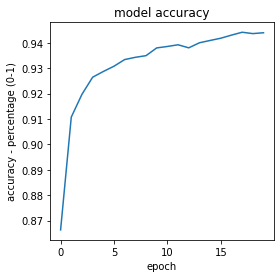

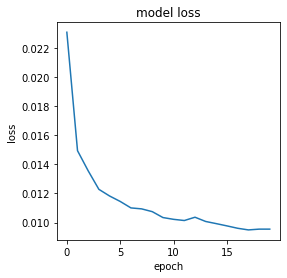

In [ ]:
plt.rcParams['figure.figsize'] =(4,4)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy - percentage (0-1)')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

## Wrong Predicitons

Visualizing the correct and incorrect output  

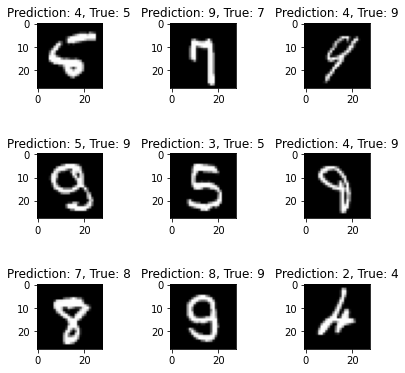

In [ ]:
# (Optional) 
# predicted_output = network.predict_classes(X_test)
plt.rcParams['figure.figsize'] =(6,6)

predicted_output = np.argmax(network.predict(X_test), axis=-1)
correct_output = np.nonzero(predicted_output == test_label)[0]
incorrect_output = np.nonzero(predicted_output != test_label)[0]
a = len(correct_output)
b = len(incorrect_output)
for i,j in enumerate(incorrect_output[0:9]):
  plt.subplot(3,3,i+1)
  plt.subplots_adjust(wspace=1,hspace=1)
  plt.imshow(X_test[j].reshape(28,28),cmap='gray')
  plt.title('Prediction: ' +str(predicted_output[j])+', True: '+str(test_label[j]))
plt.show()